
<h1 style="font-family: 'Georgia'; font-size: 42px;">
    Predictive Model For Insurance Claims 
</h1>


In [53]:
from IPython.core.display import HTML

# Define custom styles for the notebook
HTML('''
<style>
    p {
        font-family: 'Arial' ,sans-serif;
        font-size: 18px;
        line-height: 1.5;
    }
    h1 {
        font-family: 'Arial';
        font-size: 24px;
    }
</style>
''')

# Author's Note
<p style="font-family: 'Arial'; font-size: 18px; line-height: 1.5;">
This article is designed for both students and anyone interested in understanding practical data science methods. <b>If you're looking for a quick summary, skip ahead to the Results (3min) section for a concise overview of the best-performing methods. </b>

The report takes a straightforward, accessible approach, aiming to cover solutions that handle 90% of real-world issues without needing complex work. For those interested in more advanced, high-accuracy methods, please feel free to explore the <b>"Reading Reference"</b> section, which includes literature discussing more recent and intricate methodologies.

For those diving deeper, I hope this article provides valuable insights to support your learning journey. Thank you for your interest, and I welcome any feedback, suggestions, or ideas for improvement. Feel free to reach out at maverick.article@gmail.com.
</p>

# Overview (2min)

<p style="font-family: 'Arial', sans-serif; font-size: 18px; line-height: 1.5;">
    In the world of insurance, claims are rarely made, and for many policyholders, they may never be made at all. The chances of a claim occurring are near zero. This fundamental challenge of insurance claims makes it difficult for insurance companies to create an algorithm to predict the likelihood of an individual to make a claim or not.
    <br></br>
    This scenario suffers from what is known as classification imbalance (CI), where there is not enough information in certain classes for machine learning algorithms to effectively predict outcomes. Where there is insufficient data in certain classes, the algorithm's performance would suffer. To give an example, assuming the actual insurance claims are only 2% of all premiums, we could have just written down this code:
</p>


```{python}
claims="no insurance claims"
claims
```

<p style="font-family: 'Arial', sans-serif; font-size: 18px; line-height: 1.7;">
And just like that, we would achieve a  data scientist's dream- a model boasting 98% accuracy. A very impressive result, right? I would have receive call from all insurance company CEO, each eager to bring that magic into their company. But here’s the reality check: while we might achieve high metrics, it’s often at the cost of deeper insight and real-world applicability. In truth, we’re not only making life a bit more challenging for those tasked with implementation but are also learning that even the most ‘accurate’ model isn’t always the best fit. Funny enough, after all this, we’re still refining our craft, still waiting to get that call for the next big opportunity.
<br></br>
</p>

### Reading Reference (include complex-algorithm not discussed here)
* [A survey on single and multi omics data mining methods in cancer data classification](https://www.sciencedirect.com/science/article/pii/S1532046420300939)
* [A comprehensive review of object detection with deep learning](https://www.sciencedirect.com/science/article/pii/S1051200422004298) 
* [Learning From Imbalance Data](https://www.researchgate.net/publication/224541268_Learning_from_Imbalanced_Data) 
* [Classification with class imbalance problem: A review](https://www.researchgate.net/publication/288228469_Classification_with_class_imbalance_problem_A_review)
* [Frank Harrell: Classification vs. Prediction](https://www.fharrell.com/post/classification/)
* [PRO-SMOTEBoost: An adaptive SMOTEBoost probabilistic algorithm for rebalancing and improving imbalanced data classification](https://www.sciencedirect.com/science/article/pii/S0020025524014622#:~:text=SMOTEBoost%20rebalances%20many%20highly%20and,changing%20the%20update%20weights%20and)
* [Improving k Nearest Neighbor with Exemplar Generalization for Imbalanced Classification](https://link.springer.com/chapter/10.1007/978-3-642-20847-8_27). 

<h1 style="font-size: 40px;">Dataset (1min)</h1>

The dataset for car insurance model is collected from [statso.io](https://statso.io/car-insurance-modelling-case-study/) . Below is the feature and the description of the feature:

| Feature                                                                                       | Description                                                                                                                                                                      |
|-----------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| policy_id                                                                                     | Unique identifier for the insurance policy.                                                                                                                                      |
| subscription_length                                                                           | The duration for which the insurance policy is active.                                                                                                                           |
| customer_age                                                                                  | Age of the insurance policyholder, which can influence the likelihood of claims.                                                                                                 |
| vehicle_age                                                                                   | Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.                                                                        |
| model                                                                                         | The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.                                                                          |
| fuel_type                                                                                     | Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.                                                          |
| max_torque, max_power                                                                         | Engine performance characteristics that could relate to the vehicle’s mechanical condition and claim risks.                                                                      |
| engine_type                                                                                   | The type of engine, which might have implications for maintenance and claim rates.                                                                                               |
| displacement, cylinder                                                                        | Specifications related to the engine size and construction, affecting the vehicle’s performance and potentially its claim history.                                               |
| region_code                                                                                   | The code representing the geographical region of the policyholder, as claim patterns can vary regionally.                                                                        |
| region_density                                                                                | Population density of the policyholder’s region, which could correlate with accident and claim frequencies.                                                                      |
| airbags                                                                                       | The number of airbags in the vehicle, indicating safety level which can influence claim probability.                                                                             |
| is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System) | Features that enhance vehicle safety and could potentially reduce the likelihood of claims.                                                                  |
| is_parking_sensors, is_parking_camera                                                         | Parking aids that might affect the probability of making a claim, especially in urban areas.                                                                                     |
| rear_brakes_type                                                                              | Type of rear brakes, which could be related to the vehicle’s stopping capability and safety.                                                                                     |
| Various binary indicators (Yes/No) for specific vehicle amenities and safety features         | Features like steering_type, turning_radius, length, width, gross_weight, etc., which together build a profile of the vehicle’s characteristics and its associated risk factors. |
| claim_status   | Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.|

In [55]:
import pandas as pd

file_path = 'DATA SCIENCE/Insurance claims data.csv'
data = pd.read_csv(file_path)
data.head()


,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

## Data Information:

1.The dataset contains 58,592 entries with 41 columns

2.There is a mix of binary, numerical, and categorical variable

3.The claim_status is the target variable, which is the variable we want to be able to predict whether the claim was made (1) or not made (0).

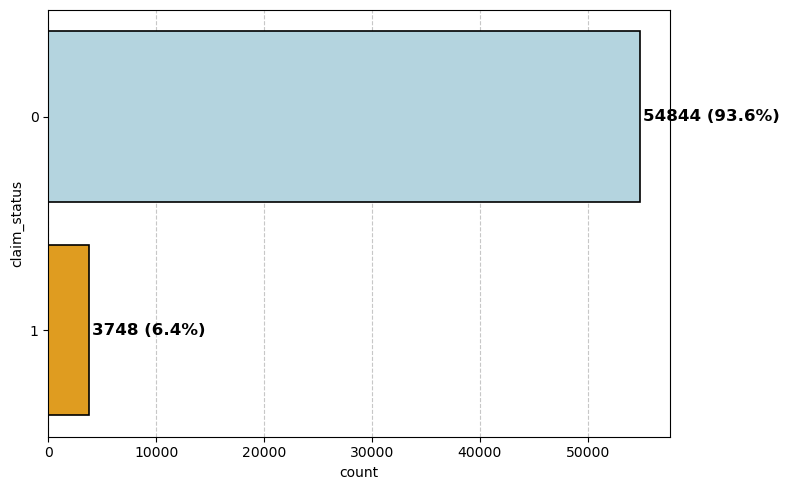

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

ax = sns.countplot(y='claim_status', data=data, hue='claim_status', palette=['lightblue', 'orange'], legend=False)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True) 
total = len(data)
for bar in ax.patches:
    count = bar.get_width()
    percentage = 100 * count / total
    ax.text(count + (total * 0.005), bar.get_y() + bar.get_height() / 2, 
            f'{int(count)} ({percentage:.1f}%)', 
            va='center', fontsize=12, color='black', weight='bold')  # Dark text for visibility

for bar in ax.patches:
    bar.set_edgecolor('black') 
    bar.set_linewidth(1.2)

plt.tight_layout()
plt.show()


<h1 style="font-size: 42px;">Method (15min)</h1>

**If you’re here for a quick overview and prefer to skip the finer details, feel free to jump ahead to the "Selected Method" section.**
<br></br>

For those ready to dive deeper, let’s make this exploration as straightforward as possible. In machine learning, there’s rarely a single “correct” answer. Instead, it’s all about making informed decisions based on available techniques. For addressing class imbalance, studies consistently highlight over-sampling and down-sampling as popular solutions:

* **Over-sampling**: This involves replicating examples from the minority class until it balances with the majority class. However, while this increases the number of examples, it does not provide new information, thus not solving the issue of insufficient data.

- **Down-sampling**: This involves eliminating examples from the majority class until it is balanced with the minority class. The downside of this approach is the potential loss of important information from the majority class.

Though these methods are widely used, research suggests there isn’t a “one-size-fits-all” approach for finding the optimal class distribution. For instance, simply aiming for a 50:50 ratio between classes doesn’t always yield the best results.
<br></br>

Broadly, there are two approaches to handling class imbalance: data-level methods and algorithm-level methods. Data-level techniques include down-sampling, over-sampling, and SMOTE, while algorithm-level methods may involve strategies like feature selection, kNN, SVM, and ensemble approaches. 
<br></br>

# Data-Level Approach

## A. SMOTE (Synthetic Minority Over-sampling Technique)

According to the paper [Classification with Class Imbalance Problem: A Review](https://www.researchgate.net/publication/288228469_Classification_with_class_imbalance_problem_A_review), SMOTE offers advantages over basic sampling techniques (like over-sampling and down-sampling):

- **Increased Diversity**: SMOTE balances the class distribution while adding variety to the training data, leading to better generalization of the model.

- **Preventing Overfitting**: Unlike random oversampling, which duplicates examples, SMOTE generates synthetic, slightly different variations of the minority class. This reduces the risk of overfitting and ensures the model doesn't memorize specific instances.
<br></br>
However, because SMOTE generates synthetic data that might not perfectly reflect real-world variations, it’s important to use it with caution. While it can be effective, SMOTE’s generated samples may sometimes introduce data points that don’t fully capture the <b>true</b> characteristics of the minority class -— essentially creating “virtual” data that lacks the depth of true minority instances. However, for the sake of this report I would try to incorporate SMOTE

<p align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*CeOd_Wbn7O6kpjSTKTIUog.png" alt="SMOTE Example" style="width:50%; display: block; margin: 0 auto;">
</p>


<br></br>

## B. Combining Downsampling and Upweighting

According to [Google's Datasets: Imbalanced Datasets](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets), an effective method is to downsample the majority class and then upweight these downwsampled examples in that downsampled majority class. This process ensures:

- **Balancing Influence**: Even though fewer examples from the majority class are used, they carry more weight during training, maintaining the overall balance between classes.

- **Reduced Bias**: Upweighting the majority class after downsampling helps reduce prediction bias. This ensures the model's predictions reflect the true distribution of the dataset, avoiding an overemphasis on the minority class.

<p align="center">
    <img src="https://developers.google.com/static/machine-learning/data-prep/images/downsampling-upweighting-v5.svg" alt="Downsampling Upweighting" style="width:50%; display: block; margin: 0 auto;">
</p>

## C. Feature Selection
Feature Selection is a method that involves identifying and retaining only the most relevant features for model training. This process reduces the dataset’s dimensionality, which can improve model performance, interpretability, and training efficiency. In the context of class imbalance, feature selection helps by focusing the model on features that provide the most effect for the minority class.

<p align="center">
    <img src="feature_selection.png" alt="Downsampling Upweighting" style="width:50%; display: block; margin: 0 auto;">
</p>

# Algorithm-Level Approach
These enhanced algorithms are modified versions of traditional models, specially designed to be more sensitive to imbalanced classes.
## A. Standard Algorithm
### 1. Logistic Regression with Class Weights
Logistic Regression is a classic, interpretable algorithm that remains effective even with class imbalance by applying class weights. By assigning a higher weight to the minority class, we can ensure it doesn’t get lost in the majority.

```{python}
PYTHON code
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
```

### 2. Random Forest with Class Weights
An ensemble of decision trees that prioritizes minority class samples when class weights are adjusted

```{python}
PYTHON Code
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
```

### 3. Gradient Boosting with scale_pos_weight (XGBoost)
XGBoost assigns higher importance to the minority class with the scale_pos_weight parameter, making it a go-to for imbalanced datasets.

```{python}
PYTHON Code
from xgboost import XGBClassifier

ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(scale_pos_weight=ratio, random_state=42)
xgb.fit(X_train, y_train)
```

### 4. CatBoost with Class Weights
CatBoost’s class weighting makes it effective on imbalanced data, especially with categorical features, and is often faster than other boosting methods.

```{python}
PYTHON CODE
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(class_weights=[1, 10], random_state=42, verbose=0)  # Adjust weights as needed
catboost.fit(X_train, y_train)
```
<br></br>

## B. Ensemble Methods

Ensemble methods take a team approach to predictions by training multiple models and combining their outputs. This approach can be incredibly powerful for imbalanced datasets. Because ensemble methods allow various models to work together, they offer many possible configurations that can be tailored to the specific needs of the data. In general, ensemble methods consists of 2 main way of approach

### 1. Bagging
In <b>Bagging</b>, we create multiple smaller subsets from the original dataset by sampling with replacement. Each subset is then used to train a separate model and the predictions from all models are combined for the final decision. Bagging helps reduce prediction variance and improves model stability.

### 2. Boosting
Boosting takes a different approach by training models sequentially, adjusting the weights of misclassified examples in each iteration. Models focus more on "hard-to-predict" instances as boosting progresses. Boosting reduces bias and improves prediction accuracy, especially for challenging cases.

<b>Popular Boosting Method:</b>

- AdaBoost: Boosting algorithm that adjusts the weights of examples after each iteration.
- SMOTEBoost: Combines SMOTE (a method for generating synthetic minority class examples) with boosting, giving minority class more representation.
- RUSBoost: Undersamples the majority class before boosting, ensuring a balanced approach
- DataBoost-IM 
- cost-sensitive boosting
<br></br>

# Hybrid Approaches
Hybrid approaches combine different machine learning techniques to tackle class imbalance. These methods might combine data-level (e.g., SMOTE) and algorithm-level (e.g., SVM) approaches or merge boosting with undersampling, creating a “hybrid” model designed to maximize performance on imbalanced data. Since hybrid methods allow for diverse model pairings, they can be customized to fit various imbalanced datasets by maximizing the benefits of each technique involved

```{python}
PYTHON Code

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

hybrid_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

hybrid_pipeline.fit(X_train, y_train)
```

![image.png](https://padraig.ca/wp-content/uploads/2022/02/good-enough.jpg)
<br></br>

## When is it Overkill?!?!
When handling class imbalance, it’s easy to wonder: should we use data-level and algorithm-level approaches together, or is that just overkill? Isn’t one method alone enough to tackle the issue? Let’s break down why a combination can be valuable—and when it might be too much.

For those tackling class imbalance for the first time, it’s tempting to go straight to data-level adjustments (like SMOTE or undersampling) to balance things out. But there’s a catch: if applying a data-level approach doesn’t boost the performance of a simple model, we may be adding noise or over-complicating the dataset for little or no gain. In such cases, data-level approaches might be unnecessary, even redundant.

## Why Start Simple?
By first applying a data-level technique and running a basic algorithm, we get an initial sense of whether balancing the data improves performance. If the results are underwhelming or don’t significantly impact metrics, it’s likely that the data-level approach isn’t adding value. At this point, moving directly to algorithm-level approaches—like ensemble methods or complex models such as XGBoost—can offer the precision and adaptability we need without altering the data itself.

## When Complex Models Make Sense
If our dataset is relatively simple or not highly imbalanced, introducing powerful models (e.g., Random Forest, Gradient Boosting) may indeed be overkill. These models come with higher computational costs and are designed to handle more intricate data patterns. However, when the imbalance is severe, and a simple model isn’t cutting it, advanced algorithm-level techniques can make all the difference, ensuring that the minority class gets the attention it deserves.


# Performance Measure
To evaluate the effectiveness of these methods, we use the following metrics:

- **Precision**: Indicates the accuracy of positive predictions.
- **Recall**: Measures the model’s ability to identify positive instances.
- **F1-Score**: Provides a balance between precision and recall.
- **AUC-ROC**: Evaluates the model's ability to distinguish between classes without setting a fixed threshold.

<h1 style="font-size: 40px;">Selected Method (3min)</h1>

## Step 1: Apply Feature Selection and Downsapling-Upweighting Technique, SMOTE
I chose this method because it makes more sense to classify the data based on feature and assign weight when doing downsampling, rather than rely on synthetic dataset. I would try SMOTE to see if synthetic data could improve our performance results

## Step 2: Simple Algorithm
I would like to continue our analysis using a simple algorithm as a baseline before using more complex method. The purpose is to compare how much improvement so it is not computationally expensive in the future. For initial analysis, I would use Logistic Regression


## Step 3: Hybrid and Ensemble Algorithm
Once the baseline from simple algorithm is done, the analysis proceeds with more complex algorithms to leverage their advanced capabilities in handling imbalanced data. I will use:

- **Random Forest with Class Weights**
- **Balanced Random Forest (Imbalanced-Learn Library)**
- **EasyEnsemble (Imbalanced-Learn Library)**
- **RUSBoost (Imbalanced-Learn Library)**
- **Gradient Boosting with Custom Class Weights**
- **Ensemble Pipeline with Class Weighting**

## Step 4:Performance Measure
To measure the performance for each method, the evaluation will be performed using precision, recall, F1-Score, and AUC-ROC scoring

<h1 style="font-size: 40px;">Data Processing</h1>

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#categorical variable -> numerical
data_copy = data.copy()
for column in data_copy.select_dtypes(include=['object']).columns:
    data_copy[column] = data_copy[column].astype('category').cat.codes

X = data_copy.drop(columns=['claim_status'])
y = data_copy['claim_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Step 1: Feature Selection and Downsampling-Upsampling

#### Feature-Selection

In [126]:
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

k = 20 #adjustable, later on will test multiple k

selector = SelectKBest(score_func=f_classif, k=k)
X_train_FS = selector.fit_transform(X_train, y_train)
X_test_FS = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]

print("Selected Features:", selected_features)
print("Shape of X_train after feature selection:", X_train_FS.shape)
print("Shape of X_test after feature selection:", X_test_FS.shape)

Selected Features: Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'model', 'fuel_type', 'max_torque',
       'max_power', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'rear_brakes_type', 'cylinder', 'steering_type', 'width',
       'is_front_fog_lights', 'is_day_night_rear_view_mirror',
       'is_speed_alert'],
      dtype='object')
Shape of X_train after feature selection: (41014, 20)
Shape of X_test after feature selection: (17578, 20)


#### Downsampling and Upweighting

In [26]:
from sklearn.utils import resample

x_majority = X_train[y_train == 0]
x_minority = X_train[y_train == 1]
y_majority = y_train[y_train == 0]
y_minority = y_train[y_train == 1]

X_majority_downsampled, y_majority_downsampled = resample(
    x_majority, y_majority, replace=False,  
    n_samples=len(x_minority),  
    random_state=42 
)

X_train_downsampled = pd.concat([X_majority_downsampled, x_minority])
y_train_downsampled = pd.concat([y_majority_downsampled, y_minority])

class_weight_DU = {0: len(x_majority) / len(x_minority), 1: 1} # assign more weight to downsampled class

print("Shapes of downsampled data:", X_train_downsampled.shape, y_train_downsampled.shape)
print("Class weights:", class_weight_DU)

Shapes of downsampled data: (5248, 40) (5248,)
Class weights: {0: 14.630335365853659, 1: 1}


#### SMOTE and SMOTENN

In [163]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

smote = SMOTE(random_state=42)
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply SMOTEENN
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

## Step 2: Baseline Model

In [28]:
from sklearn.model_selection import GridSearchCV

# fine-tune the ideal class_weight
param_grid_1 = {
    'class_weight': [{0: 1, 1: w} for w in range(1, 20)]  
}
log_reg = LogisticRegression(max_iter=1000, random_state=42)

grid_search = GridSearchCV(log_reg, param_grid_1, scoring='f1', cv=5)  #maximizing f1-score
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

C:\Users\maver\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maver\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [165]:
# Train Logistic Regression without any data-level approach
log_reg = LogisticRegression(class_weight=best_params['class_weight'], max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
# Train Logistic Regression on feature-selected data
log_reg_fs = LogisticRegression(class_weight=best_params['class_weight'], max_iter=1000, random_state=42) #assumed class_weight is same with no data-level approach
log_reg_fs.fit(X_train_FS, y_train)
# Train Logistic Regression on Downsampling-Upweighting method
log_reg_DU = LogisticRegression(class_weight=class_weight_DU, max_iter=1000, random_state=42)
log_reg_DU.fit(X_train_downsampled, y_train_downsampled)
# Train Logistic Regression on SMOTE data
log_reg_smote = LogisticRegression(class_weight=None, max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_smote, y_train_smote)
# Train Logistic Regression on SMOTEENN data
log_reg_smote_enn = LogisticRegression(class_weight=None, max_iter=1000, random_state=42)
log_reg_smote_enn.fit(X_train_smote_enn, y_train_smote_enn)

# Prediction
y_pred_log_reg = log_reg.predict(X_test) # without data-level approach
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_fs = log_reg_fs.predict(X_test_FS) # with Feature Selection
y_proba_fs = log_reg_fs.predict_proba(X_test_FS)[:, 1]  # Probabilities for 'Claim' class
y_pred_DU = log_reg_DU.predict(X_test)
y_proba_DU = log_reg_DU.predict_proba(X_test)[:, 1] 
y_pred_smote = log_reg_smote.predict(X_test)
y_proba_smote = log_reg_smote.predict_proba(X_test)[:, 1]
y_pred_smote_enn = log_reg_smote_enn.predict(X_test)
y_proba_smote_enn = log_reg_smote_enn.predict_proba(X_test)[:, 1]

# AUC-ROC score
auc_roc_log_reg = roc_auc_score(y_test, y_proba_log_reg) # without data-level approach
auc_roc_fs = roc_auc_score(y_test, y_proba_fs)
auc_roc_DU = roc_auc_score(y_test, y_proba_DU)
auc_roc_smote = roc_auc_score(y_test, y_proba_smote)
auc_roc_smote_enn = roc_auc_score(y_test, y_proba_smote_enn)

# Evaluate Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Logistic Regression:", auc_roc_log_reg)

print ('----------------------------------------------------------')

#Evaluate FeatureSelection-Logistic Regression
print("FeatureSelection-Logistic Regression Data:")
print(classification_report(y_test, y_pred_fs, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Feature-Selected Data:", auc_roc_fs)

print ('----------------------------------------------------------')

#Evaluate Downsampling Upweighting -Logistic Regression
print("DownsamplingUpweighting-Logistic Regression Data:")
print(classification_report(y_test, y_pred_DU, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Downsampling-Upweighting Data:", auc_roc_DU)

print ('----------------------------------------------------------')

print("Logistic Regression with SMOTE - Classification Report:")
print(classification_report(y_test, y_pred_smote, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Logistic Regression with SMOTE:", auc_roc_smote)

print('----------------------------------------------------------')

print("Logistic Regression with SMOTEENN - Classification Report:")
print(classification_report(y_test, y_pred_smote_enn, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Logistic Regression with SMOTEENN:", auc_roc_smote_enn)

C:\Users\maver\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maver\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.53      0.68     16454
       Claim       0.08      0.64      0.15      1124

    accuracy                           0.53     17578
   macro avg       0.52      0.58      0.41     17578
weighted avg       0.90      0.53      0.64     17578

AUC-ROC Score for Logistic Regression: 0.6147759828219469
----------------------------------------------------------
FeatureSelection-Logistic Regression Data:
              precision    recall  f1-score   support

    No Claim       0.96      0.53      0.69     16454
       Claim       0.09      0.64      0.15      1124

    accuracy                           0.54     17578
   macro avg       0.52      0.58      0.42     17578
weighted avg       0.90      0.54      0.65     17578

AUC-ROC Score for Feature-Selected Data: 0.6163189450412171
----------------------------------------------------------
DownsamplingUpweighting-

C:\Users\maver\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\maver\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\maver\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [167]:
from collections import Counter

print("Original class distribution:")
print(y_train.value_counts())

# After SMOTE
print("Class distribution after SMOTE:")
print(Counter(y_train_smote))

# After SMOTEENN
print("Class distribution after SMOTEENN:")
print(Counter(y_train_smote_enn))

Original class distribution:
claim_status
0    38390
1     2624
Name: count, dtype: int64
Class distribution after SMOTE:
Counter({0: 38390, 1: 38390})
Class distribution after SMOTEENN:
Counter({1: 24122, 0: 22589})


# Comments
Based on  results, here is some observations for each approach:
### 1. Baseline Logistic Regression
* High precision (0.96) for <b>no claim</b> indicates the model prediction is mostly accurate for this case. Recall (0.68) indicate there is many false positive claim
* AUC-ROC score 0.6148 is quite low, indicating the limited ability of model to distinguish between class effectively
### 2. Feature-Selection
* precision and recall score is almost identical, AUC-ROC only has slight improvement, indicating selected feature not adding much to model performance
* We will not use feature-selection in future model since this is
### 3. Downsampling-Upweighting
* the model almost predict everything as no-claim since precision and recall score for <b>claim</b> is 0.00


# Observation
The class imbalance is too severe for logistic regression to handle the model effectively
For future approach, we will focus on ensemble model and hybrid model.
Since there is no improvement from feature-selection, we would refer to not use it in the future as retaining more feature usually would help to catch pattern in minority class better.

Downsampling-upweighting seems to have led to stronger bias towards <b>No Claim</b>, also this method led to loss of valuable information which would be beneficial when we are doing a algorithm-level approach, as it is generally better to have more data. We would not follow-up with Downsampling-Upweighting as well.

## Step 3 : Algorithm-Level Approach

In [169]:
rf = RandomForestClassifier(random_state=42)

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200, 300],  # Adjust as needed
    'max_depth': [10, 15],       # Depth of the tree
    'min_samples_split': [2, 5], # Minimum samples required to split a node
    'min_samples_leaf': [2, 4],  # Minimum samples in a leaf node
    'class_weight': [{0: 1, 1: w} for w in [15, 20]], # Class weights for imbalance
    'criterion': ['gini', 'entropy'], # Splitting criteria
    'max_features': ['sqrt', 'log2']  # Number of features considered at each split
}

# Use F1-score for the 'Claim' class as the scoring metric
f1_scorer = make_scorer(f1_score, pos_label=1)

# Baseline model without any data-level approach
grid_search_baseline = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=f1_scorer, cv=5, n_jobs=-1, verbose=2)
grid_search_baseline.fit(X_train, y_train)
best_rf_baseline = grid_search_baseline.best_estimator_

# Model with SMOTE
grid_search_smote = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=f1_scorer, cv=5, n_jobs=-1, verbose=2)
grid_search_smote.fit(X_train_smote, y_train_smote)
best_rf_smote = grid_search_smote.best_estimator_

# Model with SMOTEENN
grid_search_smoteenn = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=f1_scorer, cv=5, n_jobs=-1, verbose=2)
grid_search_smoteenn.fit(X_train_smote_enn, y_train_smote_enn)
best_rf_smoteenn = grid_search_smoteenn.best_estimator_

# Evaluate all models on the test set
# Baseline
y_pred_baseline = best_rf_baseline.predict(X_test)
y_proba_baseline = best_rf_baseline.predict_proba(X_test)[:, 1]
auc_roc_baseline = roc_auc_score(y_test, y_proba_baseline)

print("Baseline Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Baseline:", auc_roc_baseline)

print('----------------------------------------------------------')

# SMOTE
y_pred_smote = best_rf_smote.predict(X_test)
y_proba_smote = best_rf_smote.predict_proba(X_test)[:, 1]
auc_roc_smote = roc_auc_score(y_test, y_proba_smote)

print("Random Forest with SMOTE - Classification Report:")
print(classification_report(y_test, y_pred_smote, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for SMOTE:", auc_roc_smote)

print('----------------------------------------------------------')

# SMOTEENN
y_pred_smoteenn = best_rf_smoteenn.predict(X_test)
y_proba_smoteenn = best_rf_smoteenn.predict_proba(X_test)[:, 1]
auc_roc_smoteenn = roc_auc_score(y_test, y_proba_smoteenn)

print("Random Forest with SMOTEENN - Classification Report:")
print(classification_report(y_test, y_pred_smoteenn, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for SMOTEENN:", auc_roc_smoteenn)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits


C:\Users\maver\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Baseline Random Forest - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.95      0.68      0.79     16454
       Claim       0.10      0.53      0.17      1124

    accuracy                           0.67     17578
   macro avg       0.53      0.60      0.48     17578
weighted avg       0.90      0.67      0.75     17578

AUC-ROC Score for Baseline: 0.6508755456276898
----------------------------------------------------------
Random Forest with SMOTE - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.38      0.54     16454
       Claim       0.08      0.76      0.14      1124

    accuracy                           0.40     17578
   macro avg       0.52      0.57      0.34     17578
weighted avg       0.90      0.40      0.52     17578

AUC-ROC Score for SMOTE: 0.6058715887320069
----------------------------------------------------------
Random Forest with SMOTEENN - Classific

In [131]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 300, 500, 1000],
    'max_depth': [None, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'sampling_strategy': ['auto', 0.8, 0.6, 0.5],
}

f1_scorer = make_scorer(f1_score, pos_label=1)
grid_search = GridSearchCV(estimator=brf, param_grid=param_grid, scoring=f1_scorer, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_brf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best F1-Score for Claim:", grid_search.best_score_)

# Prediction for Balanced Random Forest (Imbalanced-Learn Library)
y_pred = best_brf.predict(X_test)
y_proba = best_brf.predict_proba(X_test)[:, 1]

# Display classification report and AUC-ROC score
print("Classification Report for Optimized Balanced Random Forest:")
print(classification_report(y_test, y_pred, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Optimized Balanced Random Forest:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50, 'sampling_strategy': 0.8}
Best F1-Score for Claim: 0.16935884378652327
Classification Report for Optimized Balanced Random Forest:
              precision    recall  f1-score   support

    No Claim       0.95      0.71      0.81     16454
       Claim       0.10      0.48      0.17      1124

    accuracy                           0.70     17578
   macro avg       0.53      0.59      0.49     17578
weighted avg       0.90      0.70      0.77     17578

AUC-ROC Score for Optimized Balanced Random Forest: 0.6530131776846224


In [135]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, make_scorer, f1_score, roc_auc_score

# Define the EasyEnsembleClassifier
easy_ensemble = EasyEnsembleClassifier(random_state=42)

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [10, 30, 50],       # Number of base classifiers
    'sampling_strategy': ['auto', 0.8, 0.6],  # Sampling strategies for balancing
    'replacement': [True, False]       # Whether to sample with replacement
}

# Define the scoring metric (F1-score for the Claim class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=easy_ensemble,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_easy_ensemble = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and F1-score
print("Best Parameters:", best_params)
print("Best F1-Score for Claim:", grid_search.best_score_)

# Predict and evaluate on the test set
y_pred_easy = best_easy_ensemble.predict(X_test)
y_proba_easy = best_easy_ensemble.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report for Optimized EasyEnsemble:")
print(classification_report(y_test, y_pred_easy, target_names=['No Claim', 'Claim']))

# AUC-ROC Score
print("AUC-ROC Score for Optimized EasyEnsemble:", roc_auc_score(y_test, y_proba_easy))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 50, 'replacement': True, 'sampling_strategy': 0.8}
Best F1-Score for Claim: 0.1608324467178801
Classification Report for Optimized EasyEnsemble:
              precision    recall  f1-score   support

    No Claim       0.95      0.71      0.81     16454
       Claim       0.10      0.47      0.16      1124

    accuracy                           0.70     17578
   macro avg       0.53      0.59      0.49     17578
weighted avg       0.90      0.70      0.77     17578

AUC-ROC Score for Optimized EasyEnsemble: 0.640188493792897


In [137]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, f1_score

# Initialize RUSBoostClassifier
rus_boost = RUSBoostClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.5],   # Learning rate for boosting
    'sampling_strategy': ['auto', 0.8, 0.6]  # Undersampling strategy
}

# Define the scoring metric for optimization (F1-score for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rus_boost,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and parameters
best_rus_boost = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and corresponding F1-score
print("Best Parameters for RUSBoost:", best_params)
print("Best F1-Score for Claim:", grid_search.best_score_)

# Predict on the test set with the best model
y_pred_rusboost = best_rus_boost.predict(X_test)
y_proba_rusboost = best_rus_boost.predict_proba(X_test)[:, 1]

# Evaluate the best model
print("Classification Report for Optimized RUSBoost:")
print(classification_report(y_test, y_pred_rusboost, target_names=['No Claim', 'Claim']))

# AUC-ROC Score
auc_roc_rusboost = roc_auc_score(y_test, y_proba_rusboost)
print("AUC-ROC Score for Optimized RUSBoost:", auc_roc_rusboost)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for RUSBoost: {'learning_rate': 0.1, 'n_estimators': 100, 'sampling_strategy': 0.8}
Best F1-Score for Claim: 0.16378848995818363
Classification Report for Optimized RUSBoost:
              precision    recall  f1-score   support

    No Claim       0.95      0.73      0.82     16454
       Claim       0.10      0.44      0.16      1124

    accuracy                           0.71     17578
   macro avg       0.53      0.59      0.49     17578
weighted avg       0.90      0.71      0.78     17578

AUC-ROC Score for Optimized RUSBoost: 0.6389878263006064


In [139]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, f1_score

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],    # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required to be a leaf node
    'subsample': [0.8, 1.0],              # Fraction of samples used for fitting the individual trees
    'max_features': ['sqrt', 'log2'],     # Number of features considered for the best split
}

# Define the scoring metric for optimization (F1-score for Claim class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and parameters
best_gbc = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and corresponding F1-score
print("Best Parameters for Gradient Boosting:", best_params)
print("Best F1-Score for Claim:", grid_search.best_score_)

# Predict on the test set with the best model
y_pred_gbc = best_gbc.predict(X_test)
y_proba_gbc = best_gbc.predict_proba(X_test)[:, 1]

# Evaluate the best model
print("Classification Report for Optimized Gradient Boosting:")
print(classification_report(y_test, y_pred_gbc, target_names=['No Claim', 'Claim']))

# AUC-ROC Score
auc_roc_gbc = roc_auc_score(y_test, y_proba_gbc)
print("AUC-ROC Score for Optimized Gradient Boosting:", auc_roc_gbc)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


C:\Users\maver\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Best F1-Score for Claim: 0.016574500185105263
Classification Report for Optimized Gradient Boosting:
              precision    recall  f1-score   support

    No Claim       0.94      1.00      0.96     16454
       Claim       0.10      0.01      0.01      1124

    accuracy                           0.93     17578
   macro avg       0.52      0.50      0.49     17578
weighted avg       0.88      0.93      0.90     17578

AUC-ROC Score for Optimized Gradient Boosting: 0.6022144611506164


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define the Random Forest Classifier
rf_baseline = RandomForestClassifier(random_state=42)
rf_fs = RandomForestClassifier(random_state=42)
rf_du = RandomForestClassifier(random_state=42)

# 1. Baseline: Train and evaluate on original data (without any data-level approach)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)
y_proba_baseline = rf_baseline.predict_proba(X_test)[:, 1]

# Evaluate Baseline Random Forest
print("Baseline Random Forest Classification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Baseline Random Forest:", roc_auc_score(y_test, y_proba_baseline))

print('----------------------------------------------------------')

# 2. Feature Selection: Train and evaluate on feature-selected data
rf_fs.fit(X_train_FS, y_train)
y_pred_fs = rf_fs.predict(X_test_FS)
y_proba_fs = rf_fs.predict_proba(X_test_FS)[:, 1]

# Evaluate Feature Selection Random Forest
print("Feature-Selected Random Forest Classification Report:")
print(classification_report(y_test, y_pred_fs, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Feature-Selected Random Forest:", roc_auc_score(y_test, y_proba_fs))

print('----------------------------------------------------------')

# 3. Downsampling-Upweighting: Train and evaluate on downsampled and upweighted data
rf_du.fit(X_train_downsampled, y_train_downsampled)
y_pred_du = rf_du.predict(X_test)
y_proba_du = rf_du.predict_proba(X_test)[:, 1]

# Evaluate Downsampling-Upweighting Random Forest
print("Downsampling-Upweighting Random Forest Classification Report:")
print(classification_report(y_test, y_pred_du, target_names=['No Claim', 'Claim']))
print("AUC-ROC Score for Downsampling-Upweighting Random Forest:", roc_auc_score(y_test, y_proba_du))


Baseline Random Forest Classification Report:
              precision    recall  f1-score   support

    No Claim       0.94      1.00      0.97     16454
       Claim       0.14      0.00      0.01      1124

    accuracy                           0.94     17578
   macro avg       0.54      0.50      0.49     17578
weighted avg       0.89      0.94      0.91     17578

AUC-ROC Score for Baseline Random Forest: 0.5825928978318504
----------------------------------------------------------
Feature-Selected Random Forest Classification Report:
              precision    recall  f1-score   support

    No Claim       0.94      1.00      0.97     16454
       Claim       0.05      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.49      0.50      0.48     17578
weighted avg       0.88      0.94      0.90     17578

AUC-ROC Score for Feature-Selected Random Forest: 0.5818993326374792
---------------------------------------------------------

<h1 style="font-size: 40px;">Results(3min)</h1>